# matplotlib

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#对plt进行设置,避免中文乱码,注意Mac可用的字体是Arial Unicode MS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

## plt.show()函数

默认情况下, plt不会直接显示图像,只有调用plt.show才会显示.


在 ipython中, 也可以用魔术命令直接显示图像
%matplotlib notebook
%matplotlib inline

In [2]:
%matplotlib inline

## plt.plot()函数

plt.plot()可以绘制简单的线图

plt.plot([1,2,3,4])
plt.xlabel('x')
plt.ylabel('y轴')
plt.show

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

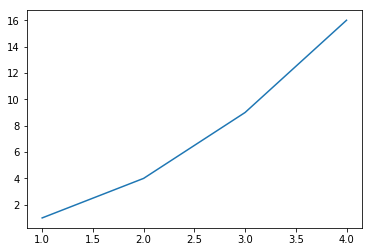

In [6]:
x = np.array([1,2,3,4])
y = np.array([1,4,9,16])
plt.plot(x, y)
plt.show()

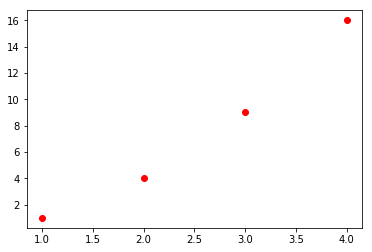

In [7]:
plt.plot(x ,y, 'ro')



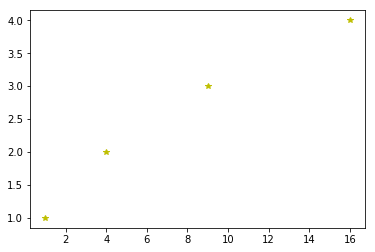

In [8]:
plt.plot(y, x,'y*')



(0.0, 1.0, 0.0, 1.0)

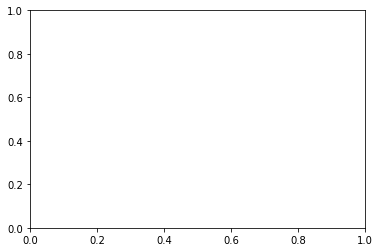

In [9]:
plt.axis()#设定坐标的范围

[0, 6, 0, 20]

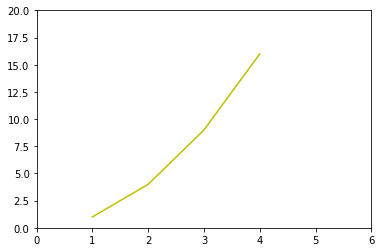

In [10]:
plt.plot([1,2,3,4],[1,4,9,16], 'y')
plt.axis([0,6,0,20])

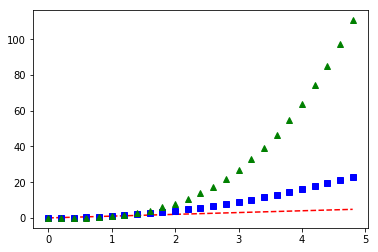

In [26]:
p = np.arange(0., 5., 0.2)
plt.plot(p, p, 'r--',
        p, p**2, 'bs',
         p, p**3, 'g^'
        )

[0, 24, 0, 30]

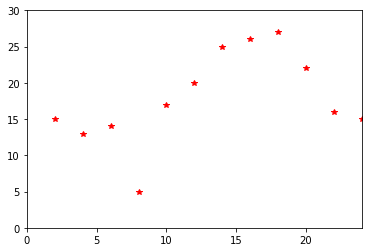

In [15]:
x = np.arange(2, 26, 2)
y = np.array([15,13,14,5,17,20,25,26,27,22,16,15])
plt.plot(x,y,'*r')
plt.axis([0,24,0,30])

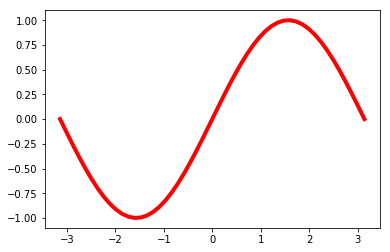

In [29]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
plt.plot(x,y,linewidth = 4.0,color = 'r')


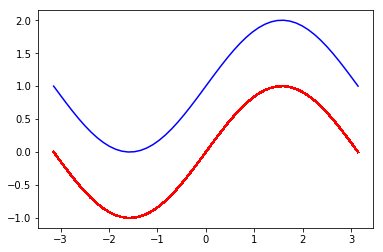

In [33]:
line1, line2 = plt.plot(x,y,'r-',
                       x,y+1, 'b-'
                       )
line1.set_antialiased(False)#抗锯齿功能关闭

[None, None]

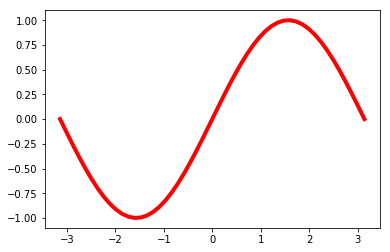

In [35]:
line=plt.plot(x,y)
plt.setp(line, linewidth = 4.0,color = 'r')

In [5]:
line=plt.plot(x,y)
plt.setp(line,'color', 'b','linewidth','3')

NameError: name 'x' is not defined

使用subplot可以在一幅图中生成多个子图
   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(ax)

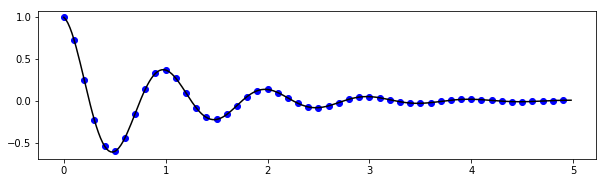

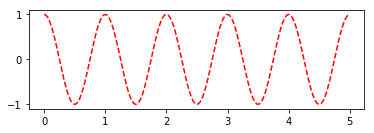

In [14]:
def f(t):
    return np.exp(-t) *np.cos(2*np.pi*t)
t1 = np.arange(0.0,5.0,0.1)
t2 = np.arange(0.0,5.0,0.02)

plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k-')
plt.show()

plt.subplot(212)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')
plt.show()

# 利用pandas数据绘图

In [1]:
#忽略掉没有用的警告
import warnings
warnings.filterwarnings('ignore')

In [2]:

#导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#对plt进行设置,避免中文乱码,注意Mac可用的字体是Arial Unicode MS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [4]:
df = pd.read_excel('doubanbook.xlsx')

In [19]:
df[:5]

,Unnamed: 0,Price,author,bookName,peapleNum,pubTime,publishing,score,level,hotlevel
0,0,20.00元,余华,活着,229378,2012-8-1,作家出版社,9.3,A,A
1,1,39.50元,[日] 东野圭吾,解忧杂货店,431667,2014-5,南海出版公司,8.5,B,A
2,2,29.00元,[美] 卡勒德·胡赛尼,追风筝的人,444305,2006-5,上海人民出版社,8.9,B,A
3,3,23.00,刘慈欣,三体,263816,2008-1,重庆出版社,8.8,B,A
4,4,29.80元,[日] 东野圭吾,白夜行,319366,2008-9,南海出版公司,9.1,A,A


# 1、绘制柱状图     plt.bar

In [26]:
df1 = df[:1000]

In [40]:
data = df['publishing'].value_counts()[:10]
data

上海译文出版社      101
人民文学出版社       97
南海出版公司        82
译林出版社         54
江苏凤凰文艺出版社     51
北京联合出版公司      33
湖南文艺出版社       31
北京十月文艺出版社     30
上海人民出版社       30
新星出版社         27
Name: publishing, dtype: int64

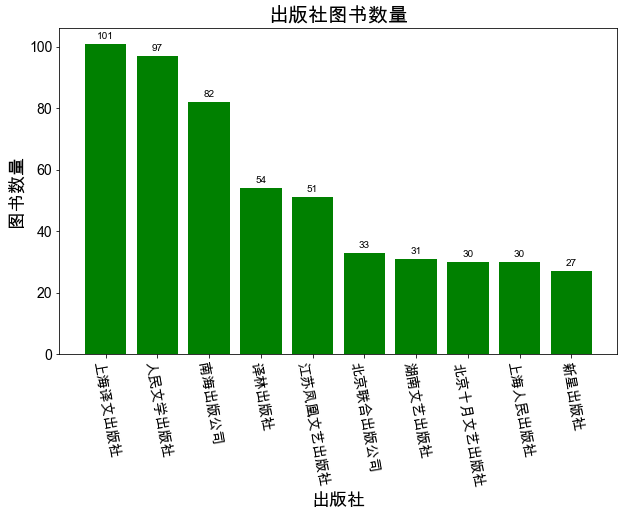

In [59]:
x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x,y, color = 'g')#绘制柱状图命令
plt.title('出版社图书数量', fontsize = 20)#标题
plt.xlabel('出版社', fontsize =18)#x轴名称及字体大小
plt.ylabel('图书数量', fontsize = 18)#y轴名称及字体大小

plt.tick_params(labelsize = 14)#轴数据字体大小
plt.xticks(rotation=-80)#x轴文字旋转指定角度

#图中显示数值
for a, b in zip(x, y):
    plt.text(a,b+1,b,ha = 'center',va = 'bottom',fontsize=10)
    
# plt.grid()#网格线
plt.show()

# 曲线图(趋势图)   plt.plot

In [72]:
df['pubTime'][:10]
list = [str(x)[:4] for x in df['pubTime']]
print(len(list))
df['pubyear'] = list

998


In [73]:
df[:10]

,Unnamed: 0,Price,author,bookName,peapleNum,pubTime,publishing,score,level,hotlevel,pubyear
0,0,20.00元,余华,活着,229378,2012-8-1,作家出版社,9.3,A,A,2012
1,1,39.50元,[日] 东野圭吾,解忧杂货店,431667,2014-5,南海出版公司,8.5,B,A,2014
2,2,29.00元,[美] 卡勒德·胡赛尼,追风筝的人,444305,2006-5,上海人民出版社,8.9,B,A,2006
3,3,23.00,刘慈欣,三体,263816,2008-1,重庆出版社,8.8,B,A,2008
4,4,29.80元,[日] 东野圭吾,白夜行,319366,2008-9,南海出版公司,9.1,A,A,2008
5,5,28.00,[日] 东野圭吾,嫌疑人X的献身,262052,2008-9,南海出版公司,8.9,B,A,2008
6,6,45.00元,林奕含,房思琪的初恋乐园,76980,2018-1,北京联合出版公司,9.2,A,A,2018
7,7,39.80元,[英] 威廉·萨默塞特·毛姆,月亮与六便士,60376,2017-1-1,浙江文艺出版社,8.8,B,A,2017
8,8,19.00,钱锺书,围城,266502,1991-2,人民文学出版社,8.9,B,A,1991
9,9,39.50元,[哥伦比亚] 加西亚·马尔克斯,百年孤独,195453,2011-6,南海出版公司,9.2,A,A,2011


In [81]:
data = df['pubyear'].value_counts()
data = data.sort_index()[:-3]
data

1900     1
1953     1
1972     1
1973     2
1976     1
1979     1
1980     1
1981     2
1982     1
1986     1
1987     2
1988     2
1989     2
1991     6
1992     1
1993     2
1994     9
1996     6
1997    12
1998     6
1999    14
2000    10
2001    10
2002    14
2003    28
2004    20
2005    35
2006    45
2007    51
2008    33
2009    53
2010    51
2011    45
2012    49
2013    55
2014    43
2015    52
2016    59
2017    83
2018    95
2019    86
Name: pubyear, dtype: int64

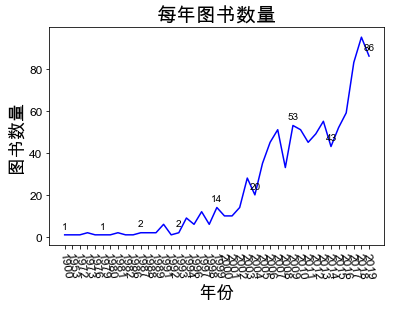

In [90]:
x = data.index
y = data.values

plt.plot(x,y,'b')

plt.title('每年图书数量', fontsize = 20)#标题
plt.xlabel('年份', fontsize =18)#x轴名称及字体大小
plt.ylabel('图书数量', fontsize = 18)#y轴名称及字体大小

plt.tick_params(labelsize = 12)#轴数据字体大小
plt.xticks(rotation=-80)#
# 每隔数年显示数字
for a,b in zip(x[::5],y[::5]):
    plt.text(a,b+2,b,ha = 'center',va = 'bottom',fontsize=10)
    
# plt.annotate('2018达到最大值',xy = (2018, data[2018]))
plt.show()

# 饼图 plt.pie

In [ ]:
# plt.pie(
#     x,每一块的比例,会自动归一化,自动计算为百分比
#     explode=None,离开中心的距离
#     labels=None,说明文字
#     colors=None,
#     autopct=None,控制饼图的百分比设置,格式
#     pctdistance=0.6,
#     shadow=False, 阴影
#     labeldistance=1.1,绘制位置,相对于半径的比例
#     startangle=None,起始绘制角度
#     radius=None,半径
#     counterclock=True,
#     wedgeprops=None,
#     textprops=None,
#     center=(0, 0),
#     frame=False,
#     rotatelabels=False,
#     *,
#     data=None,
# )

In [9]:
data = pd.cut(df['score'],[5,6,7,8,9,10]).value_counts()
#pd.cut 离散化
data

(8, 9]     592
(7, 8]     238
(9, 10]    122
(6, 7]      37
(5, 6]       4
Name: score, dtype: int64

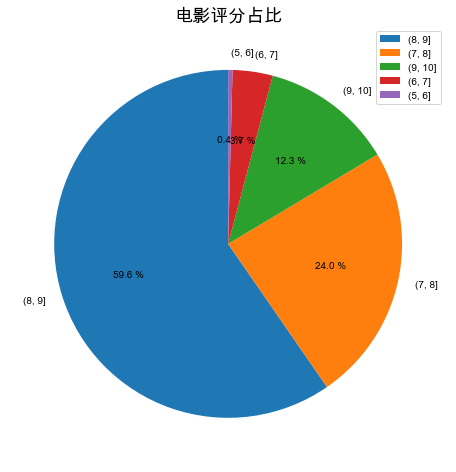

In [18]:
y = data.values
# y = y/sum(y)

plt.figure(figsize=(8,8))
plt.title('电影评分占比',fontsize = 18)

plt.pie(y, labels =data.index, 
        autopct ='%.1f %%',
#         colors ='bygr'
        startangle = 90
       )

plt.legend()#图例
plt.show()

In [24]:
data1 = df['hotlevel'].value_counts()
data1



C    200
A    200
E    199
B    199
D    199
Name: hotlevel, dtype: int64

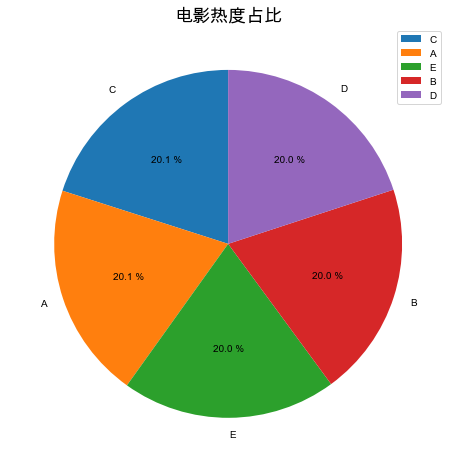

In [23]:

plt.figure(figsize=(8,8))
plt.title('电影热度占比',fontsize = 18)

plt.pie(data1.values, 
        labels =data.index, 
        autopct ='%.1f %%',
#         colors ='bygr'
        startangle = 90
       )

plt.legend()#图例
plt.show()

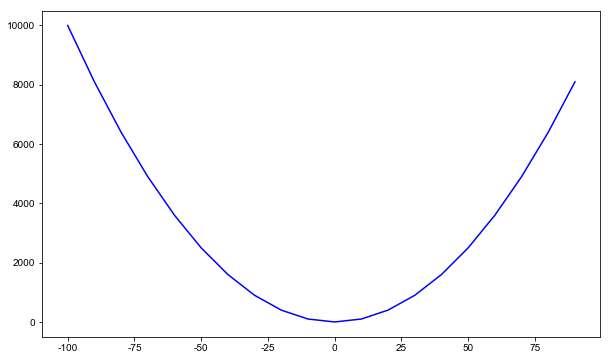

In [48]:
def f(t):
    return t**2 
t1 = np.arange(-100,100,10)

plt.figure(figsize=(10,6))
plt.plot(t1,f(t1),'b-')


plt.show()

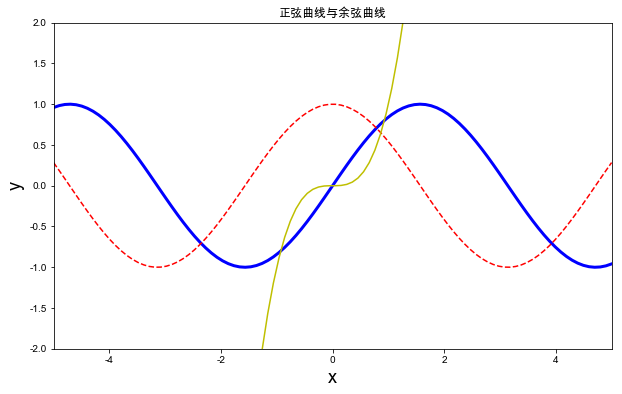

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#对plt进行设置,避免中文乱码,注意Mac可用的字体是Arial Unicode MS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

#创建数据
x = np.linspace(-5,5,100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**3


# 创建figure窗口
plt.figure(figsize=(10,6))

plt.title('正弦曲线与余弦曲线')
#画曲线
plt.plot(x,y1,'b-',linewidth =3)
plt.plot(x,y2,'r--')
plt.plot(x,y3,'y-')


#设置坐标轴范围
plt.xlim((-5,5))
plt.ylim((-2,2))

#设置坐标轴名称
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize =18)


plt.show()

# 设置绘图区域


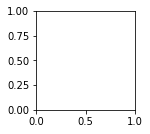

In [4]:
plt.subplot(2,3,5)
#subplot(nrows, ncols, index, **kwargs)

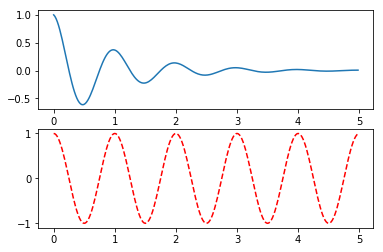

In [12]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)
a = np.arange(0,5,0.02)
plt.subplot(211)
plt.plot(a,f(a))
plt.subplot(212)
plt.plot(a,np.cos(2*np.pi*a),'r--')
plt.show()

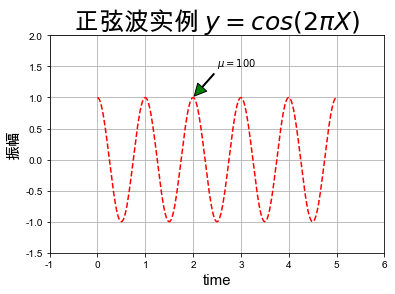

In [50]:
a = np.arange(0,5,0.02)
plt.plot(a,np.cos(2*np.pi*a),'r--')
plt.xlabel('time',fontsize=15)
plt.ylabel('振幅',fontsize=15)
plt.title(r'正弦波实例 $y=cos(2\pi X)$',fontsize=25)
plt.annotate(r'$\mu=100$',xy=(2,1), xytext=(2.5,1.5), arrowprops=dict( facecolor='g',shrink=0.05,width =1))
# Signature: plt.annotate(s, xy, *args, **kwargs)#箭头（文本内容，箭头位置，文本位置，箭头具体设置（字典格式）

plt.axis([-1,6,-1.5,2])
plt.grid(True)

plt.show()

# arrowprops : dict, optional 小箭头的各种属性
    The properties used to draw a
    `~matplotlib.patches.FancyArrowPatch` arrow between the
    positions *xy* and *xytext*.

    If *arrowprops* does not contain the key 'arrowstyle' the
    allowed keys are:

    ==========   ======================================================
    Key          Description
    ==========   ======================================================
    width        The width of the arrow in points
    headwidth    The width of the base of the arrow head in points
    headlength   The length of the arrow head in points
    shrink       Fraction of total length to shrink from both ends
    ?            Any key to :class:`matplotlib.patches.FancyArrowPatch`
    ==========   ======================================================

    If *arrowprops* contains the key 'arrowstyle' the
    above keys are forbidden.  The allowed values of
    ``'arrowstyle'`` are:

    ============   =============================================
    Name           Attrs
    ============   =============================================
    ``'-'``        None
    ``'->'``       head_length=0.4,head_width=0.2
    ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
    ``'|-|'``      widthA=1.0,widthB=1.0
    ``'-|>'``      head_length=0.4,head_width=0.2
    ``'<-'``       head_length=0.4,head_width=0.2
    ``'<->'``      head_length=0.4,head_width=0.2
    ``'<|-'``      head_length=0.4,head_width=0.2
    ``'<|-|>'``    head_length=0.4,head_width=0.2
    ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
    ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
    ``'wedge'``    tail_width=0.3,shrink_factor=0.5
    ============   =============================================

    Valid keys for `~matplotlib.patches.FancyArrowPatch` are:

    ===============  ==================================================
    Key              Description
    ===============  ==================================================
    arrowstyle       the arrow style
    connectionstyle  the connection style
    relpos           default is (0.5, 0.5)
    patchA           default is bounding box of the text
    patchB           default is None
    shrinkA          default is 2 points
    shrinkB          default is 2 points
    mutation_scale   default is text size (in points)
    mutation_aspect  default is 1.
    ?                any key for :class:`matplotlib.patches.PathPatch`
    ===============  ==================================================

    Defaults to None, i.e. no arrow is drawn.

annotation_clip : bool or None, optional
    Whether to draw the annotation when the annotation point *xy* is
    outside the axes area.

    - If *True*, the annotation will only be drawn when *xy* is
      within the axes.
    - If *False*, the annotation will always be drawn.
    - If *None*, the annotation will only be drawn when *xy* is
      within the axes and *xycoords* is 'data'.

    Defaults to *None*.

**kwargs
    Additional kwargs are passed to `~matplotlib.text.Text`.

Returns
-------
annotation : `.Annotation`

See Also

# plt.subplot2grid()
## Signature: plt.subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)

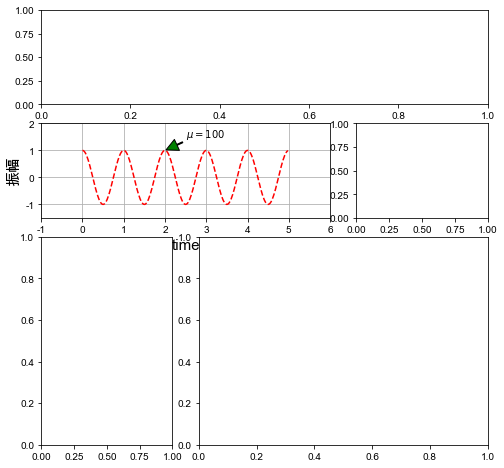

In [65]:
plt.figure(figsize=(8,8))
plt.subplot2grid((4,3),(1,0),colspan=2)
a = np.arange(0,5,0.02)
plt.plot(a,np.cos(2*np.pi*a),'r--')
plt.xlabel('time',fontsize=15)
plt.ylabel('振幅',fontsize=15)
plt.annotate(r'$\mu=100$',xy=(2,1), xytext=(2.5,1.5), arrowprops=dict( facecolor='g',shrink=0.05,width =1))
# Signature: plt.annotate(s, xy, *args, **kwargs)#箭头（文本内容，箭头位置，文本位置，箭头具体设置（字典格式）

plt.axis([-1,6,-1.5,2])
plt.grid(True)

plt.subplot2grid((4,3),(1,2),colspan=1)

plt.subplot2grid((4,3),(0,0),colspan=3)

plt.subplot2grid((4,3),(2,0),rowspan=2)

plt.subplot2grid((4,3),(2,1),rowspan=2,colspan=2)


### 将绘图代码写在区域的后面

# pie

In [67]:
import matplotlib.pyplot as plt

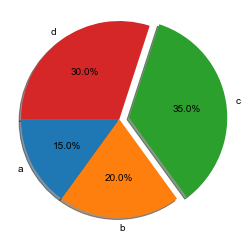

In [80]:
labels = 'a','b','c','d'
size = (15,20, 35, 30)
explode=(0,0,0.1,0)

plt.pie(size,explode =explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=180
       )
plt.axis('scaled')
plt.show()